In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import time

In [2]:
df=pd.read_excel(r'C:\Users\A803377\OneDrive - Solenis LLC\Documents\SalesData.xlsx')

In [3]:

df

,fiscal period,Region,Volume - KG/As Sold,$AR REV
0,2018001,NA_AWT,2.998144,57.307160
1,2018001,NA_AWT,243.574610,531.221560
2,2018001,EMEA_AWT,12.820000,33.145734
3,2018001,AP_AWT,92.065000,62.864790
4,2018001,NA_AWT,0.226800,-0.650160
...,...,...,...,...
15934,2022009,AP_AWT,0.000000,0.000000
15935,2022009,AP_AWT,0.000000,0.000000
15936,2022009,AP_AWT,0.000000,0.000000
15937,2022009,AP_AWT,0.000000,0.000000


In [4]:
df['month'] = df['fiscal period'].apply(lambda x: (str(x)[5:]))
df['fiscal period'] = df['fiscal period'].apply(lambda x: int(str(x)[:4]))
df["fiscal period"] = df["fiscal period"].astype(str) +'-'+df["month"]
df['fiscal period']=pd.to_datetime(df['fiscal period'])
df.drop('month',axis=1,inplace=True)

In [6]:
df['fiscal period','Region']

KeyError: ('fiscal period', 'Region')

In [7]:
df.drop(df[df['fiscal period'] > '2022-02-01'].index, inplace = True)

In [8]:
fiscal = df.groupby(['fiscal period']).sum()


In [9]:
fiscal

,Volume - KG/As Sold,$AR REV
fiscal period,,
2018-01-01,92502.072137,147195.300735
2018-02-01,93832.728982,153225.813068
2018-03-01,86074.464595,147858.116310
2018-04-01,94258.467636,159018.948006
2018-05-01,85597.627881,147324.087787
2018-06-01,92236.707257,162113.046713
2018-07-01,87764.127558,156568.005153
2018-08-01,96590.763704,161973.273335
2018-09-01,98640.076057,166239.563718


In [10]:
fiscal.to_csv('fiscal.csv',index=True)

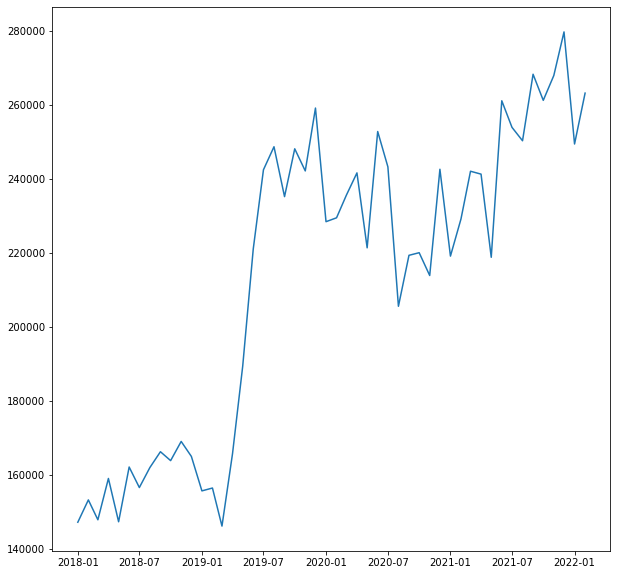

In [319]:
plt.plot(fiscal['$AR REV'])

In [361]:
fiscal.describe()

,Volume - KG/As Sold,$AR REV
count,50.000000,50.000000
mean,138904.943107,213335.831088
std,33767.941014,42040.125898
min,83106.311480,146154.506103
25%,96862.668714,165152.061486
50%,154104.215317,224841.871982
75%,164670.001833,246837.645728
max,180705.175598,279627.899300


In [320]:
region = df.groupby(['Region'])
reg_NA = region.get_group('NA_AWT').groupby(['fiscal period']).sum()

reg_EMEA = region.get_group('EMEA_AWT').groupby(['fiscal period']).sum()

reg_AP= region.get_group('AP_AWT').groupby(['fiscal period']).sum()

reg_LA= region.get_group('LA_AWT').groupby(['fiscal period']).sum()

In [327]:
reg_EMEA.head()

,Volume - KG/As Sold,$AR REV
fiscal period,,
2018-01-01,30150.441936,49493.346212
2018-02-01,31951.429624,54586.418516
2018-03-01,27605.840003,51708.351727
2018-04-01,31101.794776,56138.472127
2018-05-01,30103.186036,55243.269494


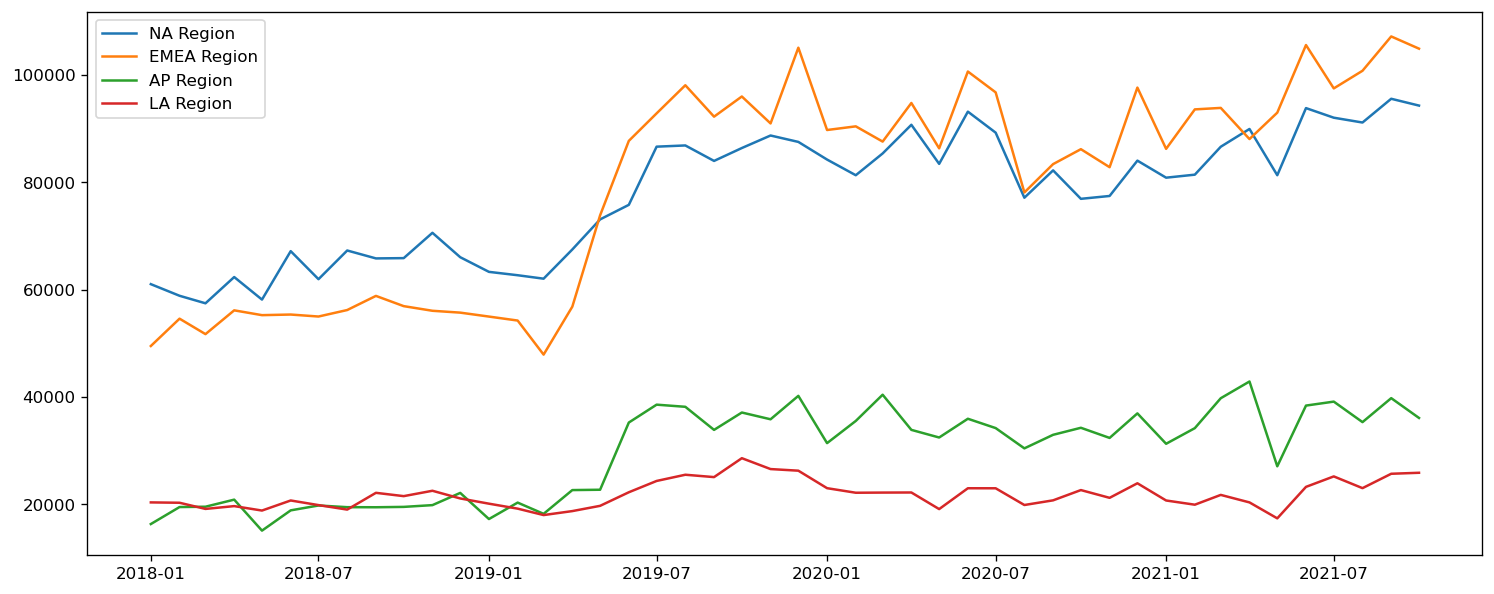

In [86]:
fig, axes = plt.subplots(dpi=120, figsize=(15,6))
plt.plot(reg_NA[:-4]['$AR REV'])
plt.plot(reg_EMEA[:-4]['$AR REV'])
plt.plot(reg_AP[:-4]['$AR REV'])
plt.plot(reg_LA[:-4]['$AR REV'])
plt.legend(["NA Region", "EMEA Region","AP Region","LA Region"])

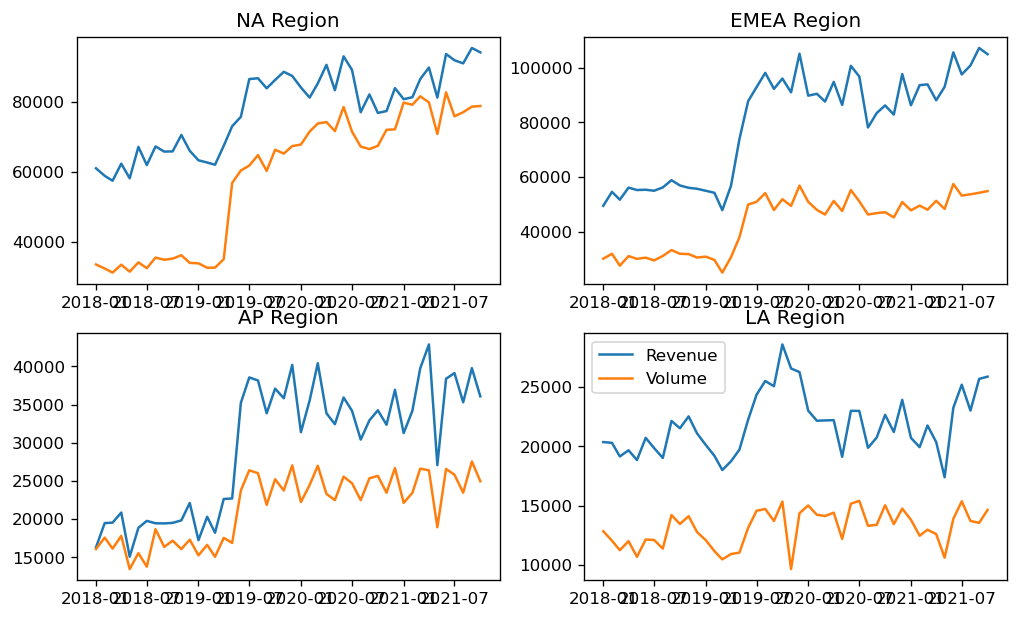

In [229]:
figure, axis = plt.subplots(2, 2,dpi=120, figsize=(10,6))

# For NA Region
axis[0, 0].plot(reg_NA[:-4]['$AR REV'])
axis[0, 0].plot(reg_NA[:-4]['Volume - KG/As Sold'])
axis[0, 0].set_title("NA Region")


# For EMEA Region
axis[0, 1].plot(reg_EMEA[:-4]['$AR REV'])
axis[0, 1].plot(reg_EMEA[:-4]['Volume - KG/As Sold'])
axis[0, 1].set_title("EMEA Region")

# For AP Region
axis[1, 0].plot(reg_AP[:-4]['$AR REV'])
axis[1, 0].plot(reg_AP[:-4]['Volume - KG/As Sold'])
axis[1, 0].set_title("AP Region")

# For LA Region
axis[1, 1].plot(reg_LA[:-4]['$AR REV'])
axis[1, 1].plot(reg_LA[:-4]['Volume - KG/As Sold'])
axis[1, 1].set_title("LA Region")
plt.legend(["Revenue", "Volume"]) 

# Combine all the operations and display

plt.show()

In [88]:
import statsmodels.api as sm

In [392]:
model=sm.tsa.statespace.SARIMAX(reg_EMEA['$AR REV'][13:],order=(1, 1, 2),seasonal_order=(1,1,2,4))
results=model.fit()

C:\Users\A803377\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\A803377\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='fiscal period'>

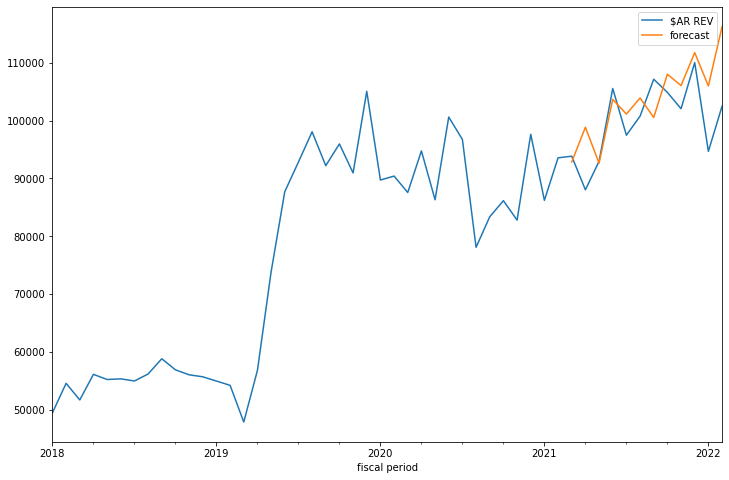

In [393]:
reg_EMEA['forecast']=results.predict(start=25,end=40,dynamic=True)
reg_EMEA[['$AR REV','forecast']].plot(figsize=(12,8))

In [369]:
reg_EMEA

,Volume - KG/As Sold,$AR REV,forecast
fiscal period,,,
2018-01-01,30150.441936,49493.346212,NaN
2018-02-01,31951.429624,54586.418516,NaN
2018-03-01,27605.840003,51708.351727,NaN
2018-04-01,31101.794776,56138.472127,NaN
2018-05-01,30103.186036,55243.269494,NaN
2018-06-01,30532.151632,55356.980535,NaN
2018-07-01,29528.032151,54987.513938,NaN
2018-08-01,31148.380897,56197.513928,NaN
2018-09-01,33300.162555,58829.911206,NaN


In [389]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import r2_score
#score variables
MAE = round(MAE(reg_EMEA['$AR REV'][38:], reg_EMEA['forecast'][38:]),2)
MSE = round(MSE(reg_EMEA['$AR REV'][38:], reg_EMEA['forecast'][38:]),2)
MAPE = round(MAPE(reg_EMEA['$AR REV'][38:], reg_EMEA['forecast'][38:]),2)

R_2 = round(r2_score(reg_EMEA['$AR REV'][38:], reg_EMEA['forecast'][38:]),4)


print(f" Mean Absolute Error: {MAE}\n")
print(f" Mean Squared Error: {MSE}\n")
print(f" Mean Absolute Percentage Error: {MAPE}\n")
print(f" R^2 Score: {R_2}\n")


 Mean Absolute Error: 5168.84

 Mean Squared Error: 44140268.14

 Mean Absolute Percentage Error: 0.05

 R^2 Score: -0.0973



In [416]:
model1=sm.tsa.statespace.SARIMAX(fiscal['$AR REV'][13:],order=(2, 1, 2),seasonal_order=(2,1,2,6))
results1=model1.fit()

C:\Users\A803377\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\A803377\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\A803377\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='fiscal period'>

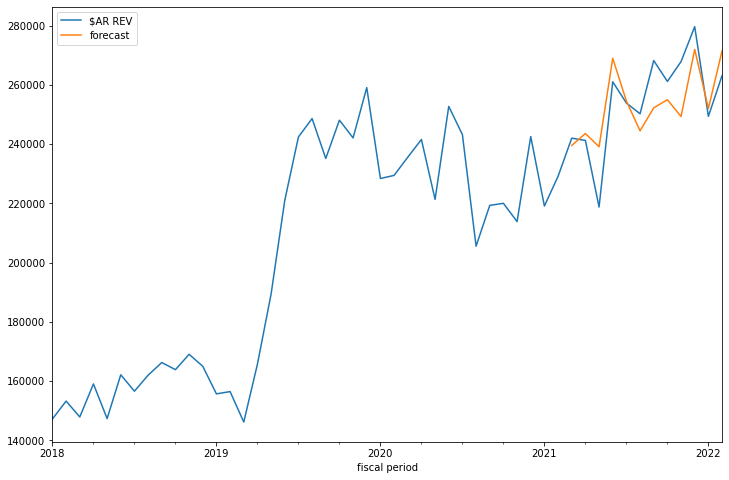

In [426]:
fiscal['forecast']=results1.predict(start=25,end=40,dynamic=True)
fiscal[['$AR REV','forecast']].plot(figsize=(12,8))

In [427]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import r2_score
#score variables
MAE = round(MAE(fiscal['$AR REV'][38:], fiscal['forecast'][38:]),2)
MSE = round(MSE(fiscal['$AR REV'][38:], fiscal['forecast'][38:]),2)
MAPE = round(MAPE(fiscal['$AR REV'][38:], fiscal['forecast'][38:]),2)

R_2 = round(r2_score(fiscal['$AR REV'][38:], fiscal['forecast'][38:]),4)


print(f" Mean Absolute Error: {MAE}\n")
print(f" Mean Squared Error: {MSE}\n")
print(f" Mean Absolute Percentage Error: {MAPE}\n")
print(f" R^2 Score: {R_2}\n")

 Mean Absolute Error: 8240.7

 Mean Squared Error: 107828916.9

 Mean Absolute Percentage Error: 0.03

 R^2 Score: 0.54



In [425]:
fiscal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2018-01-01 to 2022-02-01
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Volume - KG/As Sold  50 non-null     float64
 1   $AR REV              50 non-null     float64
 2   forecast             11 non-null     float64
dtypes: float64(3)
memory usage: 1.6 KB


In [387]:
fiscal['$AR REV'].count()

50

# Second Model 

In [282]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [283]:
ad_fuller_result_1 = adfuller(reg_EMEA['$AR REV'].diff()[1:])

print('realgdp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(reg_EMEA['Volume - KG/As Sold'].diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realgdp
ADF Statistic: -9.346789493335464
p-value: 8.503903256971536e-16

---------------------

realcons
ADF Statistic: -2.7576525944644183
p-value: 0.06458202283943051


In [284]:
print('rgnp causes ulc?\n')
print('------------------')
granger_1 = grangercausalitytests(reg_EMEA[['Volume - KG/As Sold', '$AR REV']], 4)

print('\nulc causes rgnp?\n')
print('------------------')
granger_2 = grangercausalitytests(reg_EMEA[['$AR REV', 'Volume - KG/As Sold']], 4)

rgnp causes ulc?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8394  , p=0.0561  , df_denom=46, df_num=1
ssr based chi2 test:   chi2=4.0897  , p=0.0431  , df=1
likelihood ratio test: chi2=3.9280  , p=0.0475  , df=1
parameter F test:         F=3.8394  , p=0.0561  , df_denom=46, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5204  , p=0.2302  , df_denom=43, df_num=2
ssr based chi2 test:   chi2=3.3943  , p=0.1832  , df=2
likelihood ratio test: chi2=3.2797  , p=0.1940  , df=2
parameter F test:         F=1.5204  , p=0.2302  , df_denom=43, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7023  , p=0.1820  , df_denom=40, df_num=3
ssr based chi2 test:   chi2=6.0005  , p=0.1116  , df=3
likelihood ratio test: chi2=5.6472  , p=0.1301  , df=3
parameter F test:         F=1.7023  , p=0.1820  , df_denom=40, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:

In [285]:
train_df=reg_EMEA[:-12]
test_df=reg_EMEA[-12:]

In [286]:
model = VAR(train_df.diff()[4:])

C:\Users\A803377\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [287]:
sorted_order=model.select_order(maxlags=10)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        33.82       33.92   4.886e+14       33.85
1        33.71       34.01   4.383e+14       33.79
2        33.84       34.33   5.049e+14       33.97
3        33.80       34.49   4.937e+14       33.98
4        33.89       34.78   5.666e+14       34.13
5        33.97       35.05   6.554e+14       34.26
6        33.84       35.12   6.455e+14       34.18
7        32.95       34.43   3.158e+14       33.34
8        32.90       34.57   3.920e+14       33.34
9        32.85       34.72   5.783e+14       33.35
10      31.40*      33.46*  2.932e+14*      31.94*
--------------------------------------------------


In [288]:
var_model = VARMAX(train_df, order=(5,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

C:\Users\A803377\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                   Statespace Model Results                                   
Dep. Variable:     ['Volume - KG/As Sold', '$AR REV']   No. Observations:                   38
Model:                                         VAR(5)   Log Likelihood                -713.293
                                          + intercept   AIC                           1476.586
Date:                                Tue, 22 Feb 2022   BIC                           1517.526
Time:                                        18:36:08   HQIC                          1491.152
Sample:                                    01-01-2018                                         
                                         - 02-01-2021                                         
Covariance Type:                                  opg                                         
Ljung-Box (L1) (Q):             0.05, 0.07   Jarque-Bera (JB):           0.22, 0.70
Prob(Q):                        0.83, 0.79   Prob(JB):       

In [289]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)

predictions=predict.predicted_mean

In [290]:
predictions.columns=['Vol_predicted','Rev_predicted']
predictions

,Vol_predicted,Rev_predicted
2021-03-01,49608.739993,90879.622530
2021-04-01,50102.702728,91107.079307
2021-05-01,50498.465850,92522.664760
2021-06-01,49077.049160,89179.324720
2021-07-01,48367.485077,88738.683772
2021-08-01,47397.447575,86930.800349
2021-09-01,46907.802123,85649.232616
2021-10-01,46581.764149,85067.424888
2021-11-01,46106.997693,83926.208182
2021-12-01,45520.964364,82982.385785


In [291]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<AxesSubplot:>

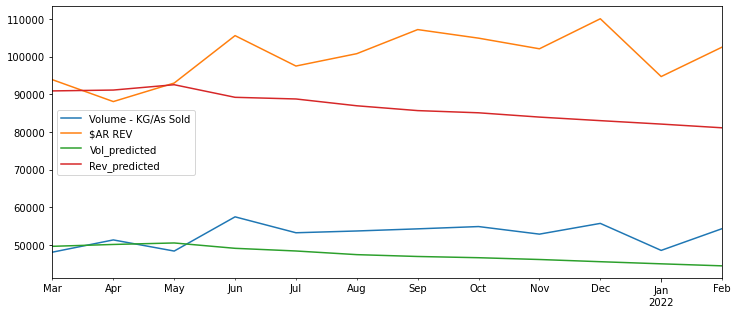

In [292]:
test_vs_pred.plot(figsize=(12,5))

# Third Model 

In [761]:
df2= fiscal['$AR REV']

df2

fiscal period
2018-01-01    147195.300735
2018-02-01    153225.813068
2018-03-01    147858.116310
2018-04-01    159018.948006
2018-05-01    147324.087787
2018-06-01    162113.046713
2018-07-01    156568.005153
2018-08-01    161973.273335
2018-09-01    166239.563718
2018-10-01    163836.289450
2018-11-01    169018.464628
2018-12-01    164971.367019
2019-01-01    155664.804762
2019-02-01    156434.081786
2019-03-01    146154.506103
2019-04-01    165694.144887
2019-05-01    189359.265727
2019-06-01    220988.240161
2019-07-01    242391.442416
2019-08-01    248614.433882
2019-09-01    235136.927511
2019-10-01    248056.372961
2019-11-01    242083.208537
2019-12-01    259061.899420
2020-01-01    228372.819389
2020-02-01    229420.413988
2020-03-01    235553.077688
2020-04-01    241552.812003
2020-05-01    221310.924575
2020-06-01    252722.560224
2020-07-01    243181.464028
2020-08-01    205523.881510
2020-09-01    219288.106213
2020-10-01    219994.141851
2020-11-01    213834.233136
2020-1

In [762]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [763]:
df2

array([[0.00779777],
       [0.05297915],
       [0.01276367],
       [0.09638207],
       [0.00876266],
       [0.11956346],
       [0.07801929],
       [0.11851626],
       [0.15047986],
       [0.13247422],
       [0.17129975],
       [0.14097837],
       [0.07125239],
       [0.07701592],
       [0.        ],
       [0.14639351],
       [0.32369567],
       [0.56066406],
       [0.72101963],
       [0.76764309],
       [0.66666786],
       [0.76346202],
       [0.7187103 ],
       [0.84591686],
       [0.61599028],
       [0.623839  ],
       [0.66978571],
       [0.7147365 ],
       [0.56308165],
       [0.7984217 ],
       [0.72693857],
       [0.44480307],
       [0.54792643],
       [0.55321614],
       [0.50706531],
       [0.72206801],
       [0.54632465],
       [0.62154769],
       [0.7180539 ],
       [0.71220216],
       [0.54393017],
       [0.86064892],
       [0.80686275],
       [0.77974836],
       [0.91434317],
       [0.8615129 ],
       [0.91172918],
       [1.   

In [764]:
##splitting dataset into train and test split
training_size=int(len(df2)*0.70)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [765]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [766]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [767]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [768]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [769]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(5,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [770]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=12,verbose=1)

Epoch 1/10
3/3 [==============================] - 14s 1s/step - loss: 0.2714 - val_loss: 0.6227
Epoch 2/10
3/3 [==============================] - 0s 44ms/step - loss: 0.2252 - val_loss: 0.5138
Epoch 3/10
3/3 [==============================] - 0s 47ms/step - loss: 0.1787 - val_loss: 0.3872
Epoch 4/10
3/3 [==============================] - 0s 49ms/step - loss: 0.1287 - val_loss: 0.2410
Epoch 5/10
3/3 [==============================] - 0s 49ms/step - loss: 0.0714 - val_loss: 0.0954
Epoch 6/10
3/3 [==============================] - 0s 48ms/step - loss: 0.0411 - val_loss: 0.0153
Epoch 7/10
3/3 [==============================] - 0s 48ms/step - loss: 0.0584 - val_loss: 0.0131
Epoch 8/10
3/3 [==============================] - 0s 51ms/step - loss: 0.0649 - val_loss: 0.0151
Epoch 9/10
3/3 [==============================] - 0s 48ms/step - loss: 0.0473 - val_loss: 0.0441
Epoch 10/10
3/3 [==============================] - 0s 46ms/step - loss: 0.0429 - val_loss: 0.0800


In [771]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [772]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [773]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
MAE = round(MAE(y_train,train_predict),2)
MSE = round(MSE(y_train,train_predict),2)
math.sqrt(mean_squared_error(y_train,train_predict))

print(f" Mean Absolute Error: {MAE}\n")
print(f" Mean Squared Error: {MSE}\n")

 Mean Absolute Error: 201077.78

 Mean Squared Error: 40703228474.99



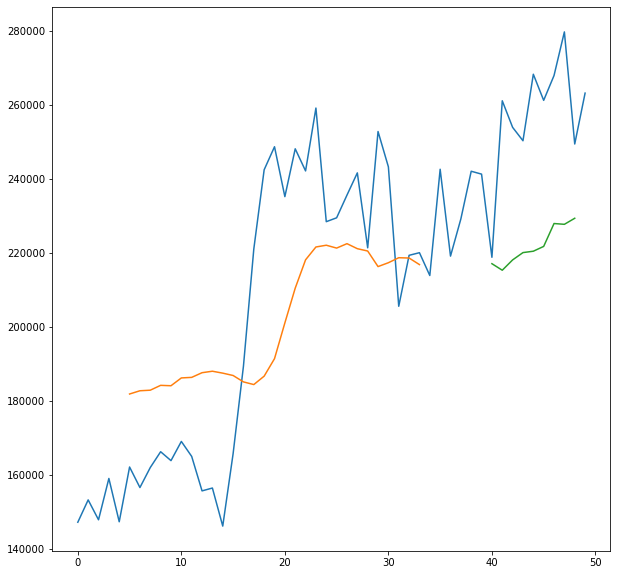

In [774]:
### Plotting 
# shift train predictions for plotting
look_back=5
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Fourth Model

In [348]:
df1= df.drop(df[df['fiscal period'] < '2019-07-01'].index)

In [349]:
df1

,fiscal period,SalesGroup,SalesGroupDesc,Region,Volume - KG/As Sold,$AR REV
4988,2019-07-01,2P5,P&P MIDEAST NORTH,NA_AWT,2533.419368,2089.844110
4989,2019-07-01,42I,IWT NA MARATHON STH,NA_AWT,306.711582,1057.555160
4990,2019-07-01,47P,P&P SE FLORIDA WEST,NA_AWT,290.967494,837.389760
4991,2019-07-01,I18,IWT RUSSIA,EMEA_AWT,1434.656002,4145.619766
4992,2019-07-01,PAP,P&P AP,AP_AWT,36.391000,-74.161533
...,...,...,...,...,...,...
14936,2022-02-01,96I,AM IWT LA BR III 3,LA_AWT,283.688001,594.415656
14937,2022-02-01,P20,P&P ITALY NE,EMEA_AWT,977.865000,1627.963608
14938,2022-02-01,P22,P&P MRG,EMEA_AWT,641.880001,1278.434809
14939,2022-02-01,P66,P&P CHINA SOUTH 3,AP_AWT,470.628511,485.753942


In [350]:
region = df1.groupby(['Region'])
reg_NA1 = region.get_group('NA_AWT').groupby(['fiscal period']).sum()

reg_EMEA1 = region.get_group('EMEA_AWT').groupby(['fiscal period']).sum()

reg_AP1= region.get_group('AP_AWT').groupby(['fiscal period']).sum()

reg_LA1= region.get_group('LA_AWT').groupby(['fiscal period']).sum()

In [351]:
reg_EMEA1['Vol_LastMonth']=reg_EMEA1['Volume - KG/As Sold'].shift(+1)
reg_EMEA1['Vol_2Monthsback']=reg_EMEA1['Volume - KG/As Sold'].shift(+2)
reg_EMEA1['Vol_3Monthsback']=reg_EMEA1['Volume - KG/As Sold'].shift(+3)
reg_EMEA1['Vol_4Monthsback']=reg_EMEA1['Volume - KG/As Sold'].shift(+4)

reg_EMEA1

,Volume - KG/As Sold,$AR REV,Vol_LastMonth,Vol_2Monthsback,Vol_3Monthsback,Vol_4Monthsback
fiscal period,,,,,,
2019-07-01,50941.601217,92836.974332,NaN,NaN,NaN,NaN
2019-08-01,54113.630684,98075.558681,50941.601217,NaN,NaN,NaN
2019-09-01,47930.799915,92221.123852,54113.630684,50941.601217,NaN,NaN
2019-10-01,51884.590727,95979.974009,47930.799915,54113.630684,50941.601217,NaN
2019-11-01,49451.685580,90959.944133,51884.590727,47930.799915,54113.630684,50941.601217
2019-12-01,56871.072835,105071.501568,49451.685580,51884.590727,47930.799915,54113.630684
2020-01-01,50950.826210,89734.983600,56871.072835,49451.685580,51884.590727,47930.799915
2020-02-01,47989.584084,90416.924669,50950.826210,56871.072835,49451.685580,51884.590727
2020-03-01,46290.592520,87576.852528,47989.584084,50950.826210,56871.072835,49451.685580


In [352]:
reg_EMEA1=reg_EMEA1.dropna()
reg_EMEA1

,Volume - KG/As Sold,$AR REV,Vol_LastMonth,Vol_2Monthsback,Vol_3Monthsback,Vol_4Monthsback
fiscal period,,,,,,
2019-11-01,49451.685580,90959.944133,51884.590727,47930.799915,54113.630684,50941.601217
2019-12-01,56871.072835,105071.501568,49451.685580,51884.590727,47930.799915,54113.630684
2020-01-01,50950.826210,89734.983600,56871.072835,49451.685580,51884.590727,47930.799915
2020-02-01,47989.584084,90416.924669,50950.826210,56871.072835,49451.685580,51884.590727
2020-03-01,46290.592520,87576.852528,47989.584084,50950.826210,56871.072835,49451.685580
2020-04-01,51265.868754,94770.298681,46290.592520,47989.584084,50950.826210,56871.072835
2020-05-01,47594.702444,86321.427013,51265.868754,46290.592520,47989.584084,50950.826210
2020-06-01,55234.630578,100630.417370,47594.702444,51265.868754,46290.592520,47989.584084
2020-07-01,51138.555464,96747.029480,55234.630578,47594.702444,51265.868754,46290.592520


In [353]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [354]:
import numpy as np
x1,x2,x3,x4,y=reg_EMEA1['Vol_LastMonth'],reg_EMEA1['Vol_2Monthsback'],reg_EMEA1['Vol_3Monthsback'],reg_EMEA1['Vol_4Monthsback'],reg_EMEA1['Volume - KG/As Sold']
x1,x2,x3,x4,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(y)
x1,x2,x3,x4,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4),axis=1)
print(final_x)

[[51884.59072737 47930.79991486 54113.63068433 50941.60121654]
 [49451.68557964 51884.59072737 47930.79991486 54113.63068433]
 [56871.07283468 49451.68557964 51884.59072737 47930.79991486]
 [50950.82621034 56871.07283468 49451.68557964 51884.59072737]
 [47989.58408356 50950.82621034 56871.07283468 49451.68557964]
 [46290.59252009 47989.58408356 50950.82621034 56871.07283468]
 [51265.86875354 46290.59252009 47989.58408356 50950.82621034]
 [47594.7024439  51265.86875354 46290.59252009 47989.58408356]
 [55234.63057818 47594.7024439  51265.86875354 46290.59252009]
 [51138.55546397 55234.63057818 47594.7024439  51265.86875354]
 [46298.13527768 51138.55546397 55234.63057818 47594.7024439 ]
 [46810.18597278 46298.13527768 51138.55546397 55234.63057818]
 [47134.43110821 46810.18597278 46298.13527768 51138.55546397]
 [45236.9123433  47134.43110821 46810.18597278 46298.13527768]
 [50849.51856885 45236.9123433  47134.43110821 46810.18597278]
 [47825.10033168 50849.51856885 45236.9123433  47134.43

In [355]:
X_train,X_test,y_train,y_test=final_x[:-5],final_x[-5:],y[:-5],y[-5:]

In [358]:
model.fit(X_train,y_train)

RandomForestRegressor(max_features=3, random_state=1)

R2_Score -0.5142066263671776


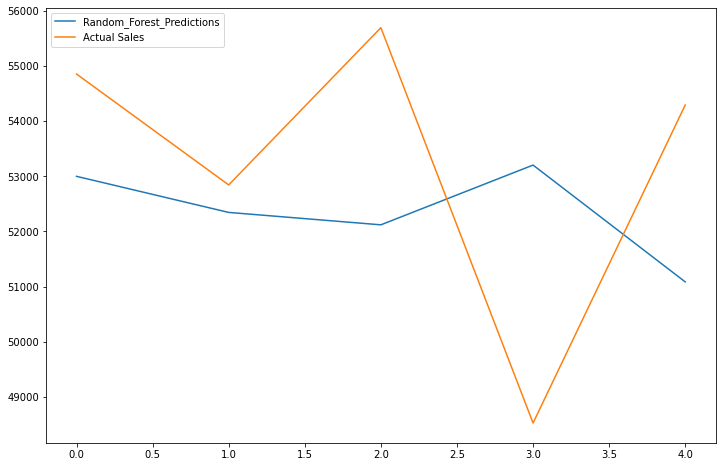

In [360]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
print('R2_Score',r2_score(y_test, pred)) 
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [70]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [71]:
lin_model.fit(X_train,y_train)

LinearRegression()

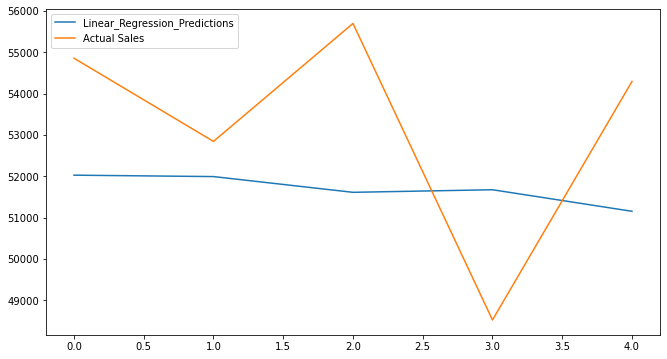

In [72]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()


In [100]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'fbprophet'

In [147]:
reg_NA.describe()

,Volume - KG/As Sold,$AR REV
count,50.000000,50.000000
mean,59586.706294,79321.331785
std,18906.700368,12373.763461
min,31080.196025,57450.561155
25%,34978.945023,67196.279752
50%,67317.326569,81815.851743
75%,74186.594474,89109.693481
max,82808.575357,99335.774476


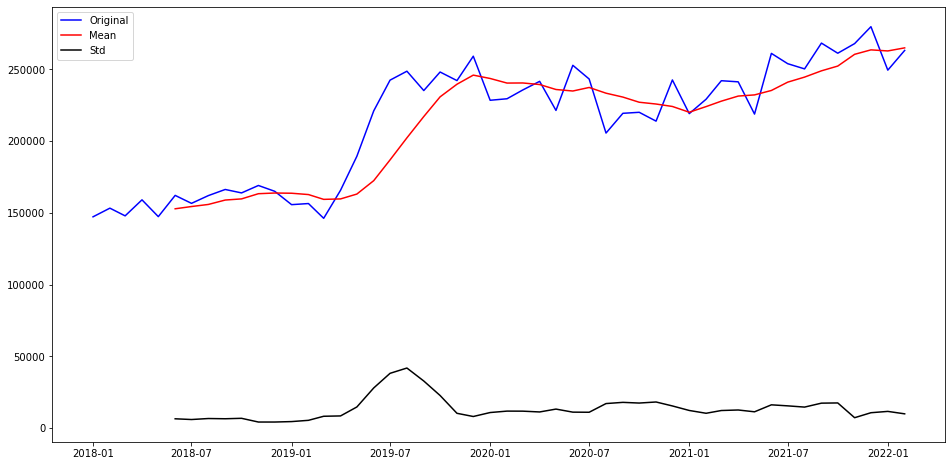

In [196]:
rolling_mean = fiscal['$AR REV'].rolling(6).mean()
rolling_std = fiscal['$AR REV'].rolling(6).std()

plt.figure(figsize =(16,8))
plt.figure(1)

org= plt.plot(fiscal['$AR REV'],color='blue', label= 'Original')
mean= plt.plot(rolling_mean,color='red', label= 'Mean')
std= plt.plot(rolling_std,color='black', label= 'Std')
plt.legend(loc='best')
plt.show()



# Making Series Stationary 

In [442]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
# Multiplicative Decomposition 
mul_result = seasonal_decompose(fiscal['$AR REV'], model='multiplicative',period=1)

# Additive Decomposition
add_result = seasonal_decompose(fiscal['$AR REV'], model='additive',period=1)

Text(0.5, 0.98, '\nMultiplicative Decompose')

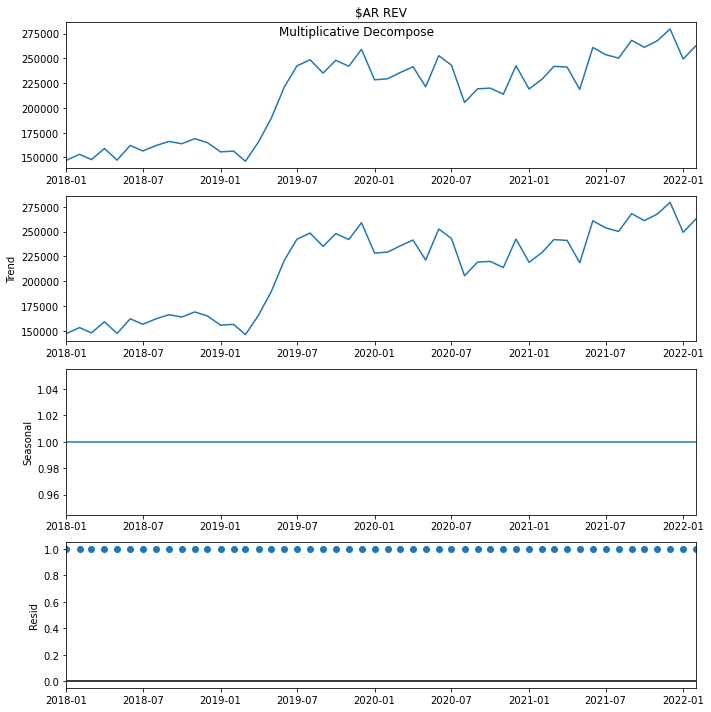

In [443]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)

In [444]:
adj_log = np.log(fiscal['$AR REV'])

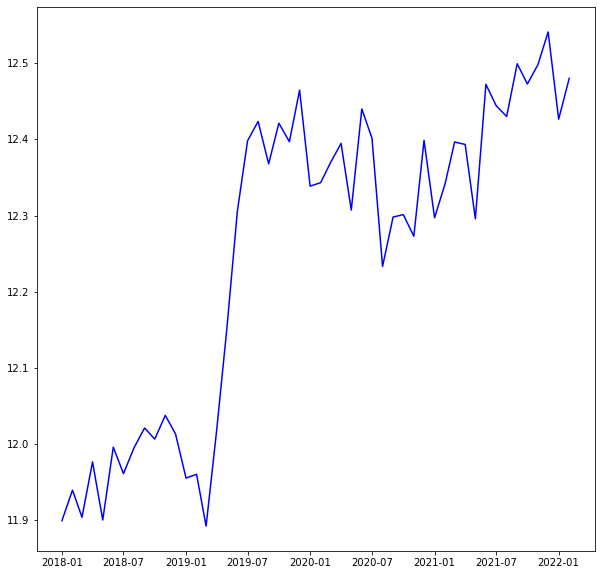

In [460]:
plt.plot(adj_log,color='blue', label= 'Original')

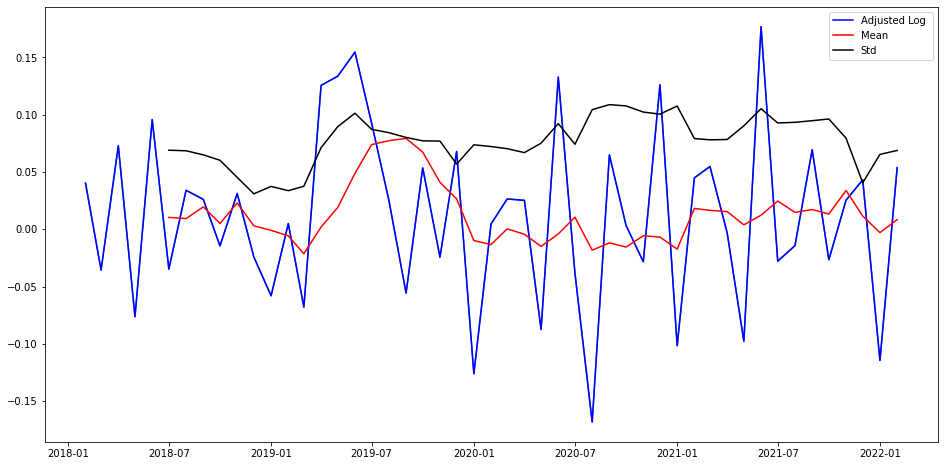

In [446]:
plt.figure(figsize =(16,8))
plt.figure(1)

adj_log_diff = adj_log-adj_log.shift()
plt.plot(adj_log_diff)



rolling_mean_log = adj_log_diff.rolling(6).mean()
rolling_std_log = adj_log_diff.rolling(6).std()

org= plt.plot(adj_log_diff,color='blue', label= 'Adjusted Log ')
mean= plt.plot(rolling_mean_log,color='red', label= 'Mean')
std= plt.plot(rolling_std_log,color='black', label= 'Std')
plt.legend(loc='best')
plt.show()

In [447]:
adj_log.shift()

fiscal period
2018-01-01          NaN
2018-02-01    11.899516
2018-03-01    11.939668
2018-04-01    11.904008
2018-05-01    11.976779
2018-06-01    11.900390
2018-07-01    11.996049
2018-08-01    11.961246
2018-09-01    11.995187
2018-10-01    12.021185
2018-11-01    12.006623
2018-12-01    12.037763
2019-01-01    12.013527
2019-02-01    11.955460
2019-03-01    11.960390
2019-04-01    11.892420
2019-05-01    12.017899
2019-06-01    12.151401
2019-07-01    12.305865
2019-08-01    12.398309
2019-09-01    12.423659
2019-10-01    12.367923
2019-11-01    12.421411
2019-12-01    12.397037
2020-01-01    12.464822
2020-02-01    12.338735
2020-03-01    12.343311
2020-04-01    12.369692
2020-05-01    12.394843
2020-06-01    12.307324
2020-07-01    12.440048
2020-08-01    12.401563
2020-09-01    12.233318
2020-10-01    12.298142
2020-11-01    12.301356
2020-12-01    12.272956
2021-01-01    12.398886
2021-02-01    12.297166
2021-03-01    12.341978
2021-04-01    12.396675
2021-05-01    12.393442
20

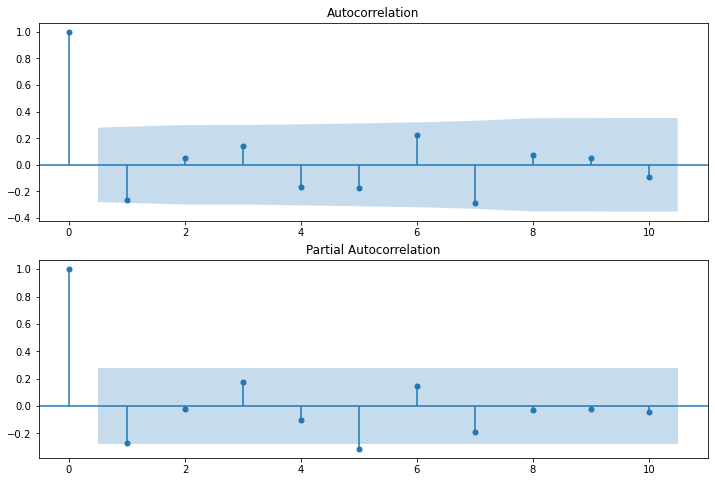

In [448]:
from statsmodels.tsa.stattools import acf, pacf

acf=acf(adj_log_diff,nlags=1)
pacf=pacf(adj_log_diff,nlags=1)

import statsmodels.api as statm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = statm.graphics.tsa.plot_acf(adj_log_diff.dropna(),lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = statm.graphics.tsa.plot_pacf(adj_log_diff.dropna(),lags=10,ax=ax2)

In [449]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
        


In [450]:
adf_test(adj_log_diff.dropna())

1. ADF :  -8.892629743222882
2. P-Value :  1.2307257242998476e-14
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 48
5. Critical Values :
	 1% :  -3.5745892596209488
	 5% :  -2.9239543084490744
	 10% :  -2.6000391840277777


In [451]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(adj_log.dropna(), trace=True,
suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-109.810, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-111.324, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-111.030, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-110.625, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-109.335, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-109.329, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-107.325, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-111.459, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-109.495, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-109.473, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-111.052, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-107.739, Time=0.21 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 2.194 seconds


In [452]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(adj_log_diff.dropna(),order=(1,0,0))
model_fit=model.fit()

C:\Users\A803377\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\A803377\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


C:\Users\A803377\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\A803377\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\A803377\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


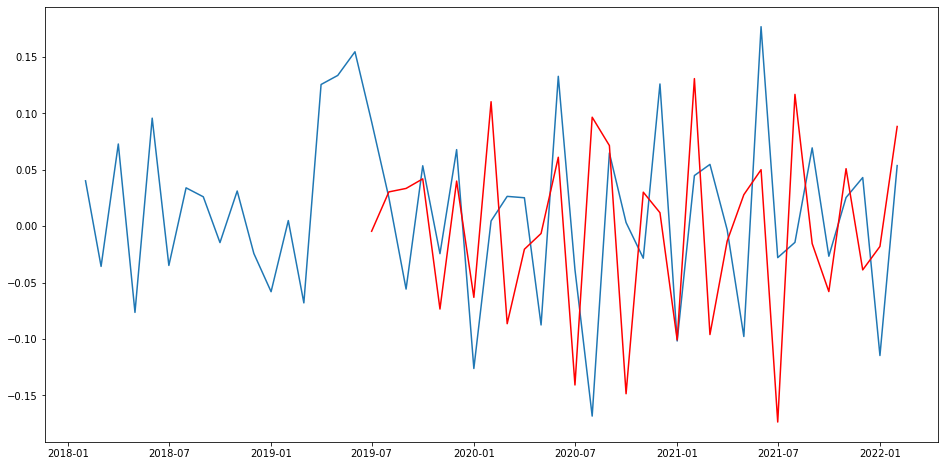

In [482]:
plt.figure(figsize=(16,8))
model=ARIMA(adj_log_diff.dropna()[16:],order=(1,1,0))
model_fit=model.fit(disp=-1)
plt.plot(adj_log_diff)
plt.plot(model_fit.fittedvalues,color='red')


In [483]:
ARIMA_diff= pd.Series(model_fit.fittedvalues,copy=True)
ARIMA_diff.head()

fiscal period
2019-07-01   -0.004509
2019-08-01    0.030336
2019-09-01    0.033411
2019-10-01    0.041887
2019-11-01   -0.073419
dtype: float64

In [484]:
ARIMA_diff_cumsum = ARIMA_diff.cumsum()
ARIMA_diff_cumsum.head()

fiscal period
2019-07-01   -0.004509
2019-08-01    0.025826
2019-09-01    0.059238
2019-10-01    0.101125
2019-11-01    0.027706
dtype: float64

In [485]:
ARIMA_log = pd.Series(adj_log.iloc[16:],index=adj_log.index)
ARIMA_log = ARIMA_log.add(ARIMA_diff_cumsum,fill_value=0)
ARIMA_log.head()

fiscal period
2018-01-01   NaN
2018-02-01   NaN
2018-03-01   NaN
2018-04-01   NaN
2018-05-01   NaN
dtype: float64

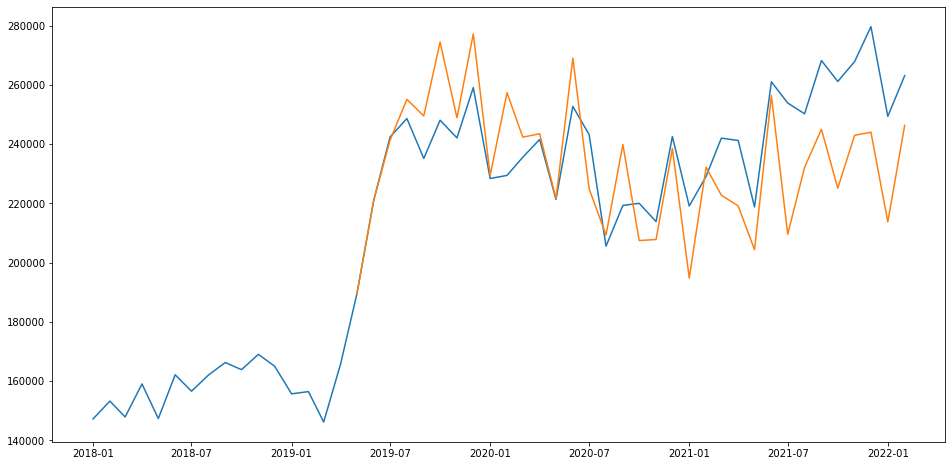

In [486]:
plt.figure(figsize=(16,8))
pred_ARIMA= np.exp(ARIMA_log)
plt.plot(fiscal['$AR REV'])
plt.plot(pred_ARIMA)


# ARIMA From 2019-06-01

In [643]:
adj_log = np.log(fiscal['$AR REV'][18:])

In [644]:
adj_log

fiscal period
2019-07-01    12.398309
2019-08-01    12.423659
2019-09-01    12.367923
2019-10-01    12.421411
2019-11-01    12.397037
2019-12-01    12.464822
2020-01-01    12.338735
2020-02-01    12.343311
2020-03-01    12.369692
2020-04-01    12.394843
2020-05-01    12.307324
2020-06-01    12.440048
2020-07-01    12.401563
2020-08-01    12.233318
2020-09-01    12.298142
2020-10-01    12.301356
2020-11-01    12.272956
2020-12-01    12.398886
2021-01-01    12.297166
2021-02-01    12.341978
2021-03-01    12.396675
2021-04-01    12.393442
2021-05-01    12.295706
2021-06-01    12.472384
2021-07-01    12.444496
2021-08-01    12.430136
2021-09-01    12.499470
2021-10-01    12.472826
2021-11-01    12.498168
2021-12-01    12.541215
2022-01-01    12.426628
2022-02-01    12.480276
Name: $AR REV, dtype: float64

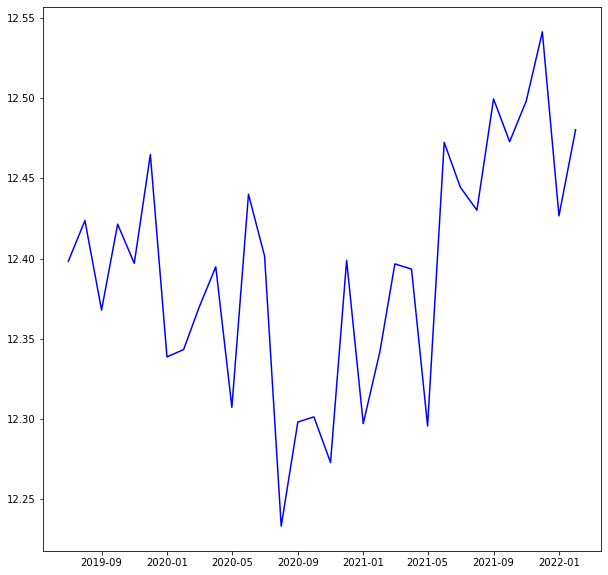

In [645]:
plt.plot(adj_log,color='blue', label= 'Original')

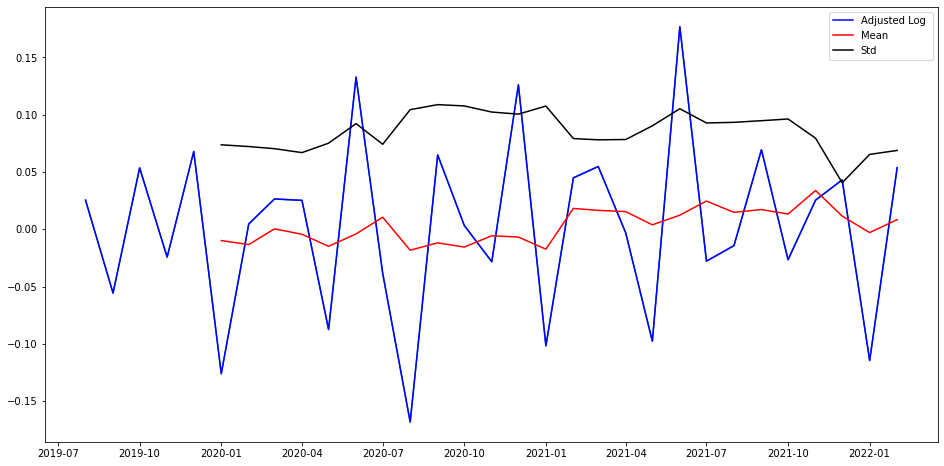

In [646]:
plt.figure(figsize =(16,8))
plt.figure(1)

adj_log_diff = adj_log-adj_log.shift()
plt.plot(adj_log_diff)



rolling_mean_log = adj_log_diff.rolling(6).mean()
rolling_std_log = adj_log_diff.rolling(6).std()

org= plt.plot(adj_log_diff,color='blue', label= 'Adjusted Log ')
mean= plt.plot(rolling_mean_log,color='red', label= 'Mean')
std= plt.plot(rolling_std_log,color='black', label= 'Std')
plt.legend(loc='best')
plt.show()

C:\Users\A803377\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\A803377\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


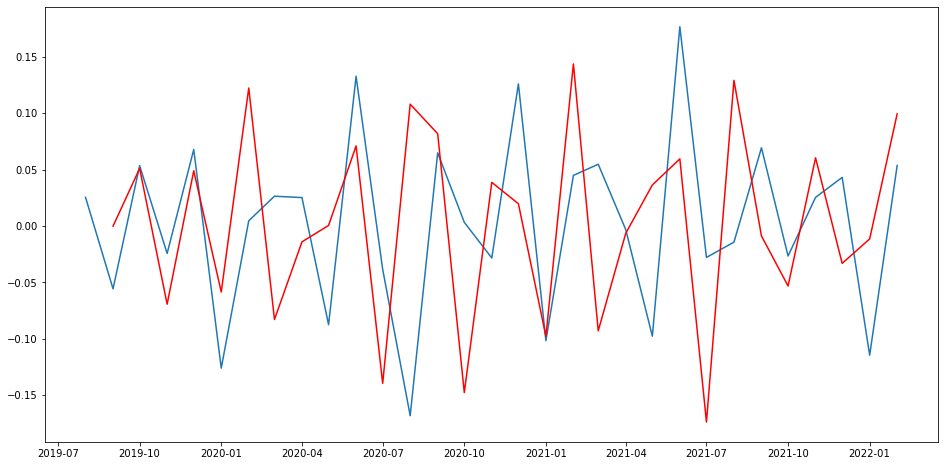

In [690]:
plt.figure(figsize=(16,8))
model=ARIMA(adj_log_diff.dropna(),order=(1,1,0))
model_fit=model.fit(disp=-5)
plt.plot(adj_log_diff)
plt.plot(model_fit.fittedvalues,color='red')

In [680]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.$AR REV   No. Observations:                   30
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  24.753
Method:                       css-mle   S.D. of innovations              0.105
Date:                Fri, 25 Feb 2022   AIC                            -43.506
Time:                        16:33:41   BIC                            -39.303
Sample:                    09-01-2019   HQIC                           -42.161
                         - 02-01-2022                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0002      0.012     -0.016      0.987      -0.024       0.023
ar.L1.D.$AR REV    -0.6324      0.140     -4.506      0.000      -0.908      -0.357
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5812           +0.0000j            1.5812            0.5000
-----------------------------------------------------------------------------
"""

In [698]:
step = 3
from pandas.tseries.offsets import DateOffset
future_dates=[adj_log.index[-1]+ DateOffset(months=x)for x in range(0,step+1)]
#Predictions for Current time Line 
ARIMA_diff= pd.Series(model_fit.fittedvalues,copy=True)
ARIMA_diff_cumsum = ARIMA_diff.cumsum()
ARIMA_log = pd.Series(adj_log.iloc[0],index=adj_log.index)
ARIMA_log = ARIMA_log.add(ARIMA_diff_cumsum,fill_value=0)
pred_ARIMA= np.exp(ARIMA_log)

#Predictions for Futrure Time Line
# Forecast
fc, se, conf = model_fit.forecast(step,alpha=0.05)

actual = fc
X =np.squeeze(conf[:,[0]])
Y = np.squeeze(conf[:, [1]])
#Fitting the Values to Predicted Date
actual_pred = pd.Series(adj_log.iloc[0],index=future_dates[1:])
actual_pred = actual_pred.add(actual,fill_value=0)

X_pred = pd.Series(adj_log.iloc[0],index=future_dates[1:])
X_pred = X_pred.add(X,fill_value=0)

Y_pred = pd.Series(adj_log.iloc[0],index=future_dates[1:])
Y_pred = Y_pred.add(Y,fill_value=0)

#Exponentioal of the Valaues 
actual_pred= np.exp(actual_pred)
pred_lower = np.exp(X_pred)
pred_upper = np.exp(Y_pred)

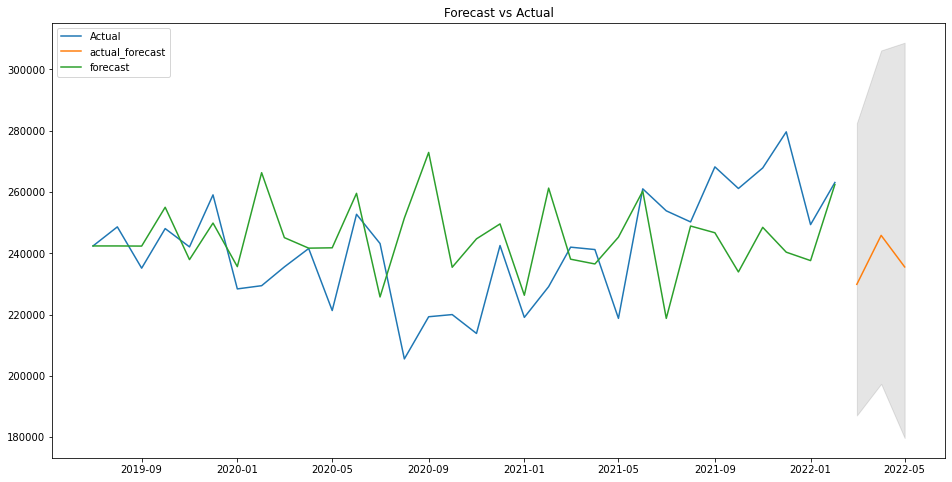

In [699]:
plt.figure(figsize=(16, 8))
plt.plot(fiscal['$AR REV'][18:], label="Actual")
plt.plot(actual_pred, label="actual_forecast")
plt.plot(pred_ARIMA, label="forecast")
plt.fill_between(pred_lower.index, pred_lower, pred_upper, color="k", alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

In [664]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import r2_score
#score variables
MAE = round(MAE(fiscal['$AR REV'][18:], pred_ARIMA),2)
MSE = round(MSE(fiscal['$AR REV'][18:], pred_ARIMA),2)
MAPE = round(MAPE(fiscal['$AR REV'][18:], pred_ARIMA),2)



print(f" Mean Absolute Error: {MAE}\n")
print(f" Mean Squared Error: {MSE}\n")
print(f" Mean Absolute Percentage Error: {MAPE}\n")



 Mean Absolute Error: 16148.42

 Mean Squared Error: 470781934.88

 Mean Absolute Percentage Error: 0.07



In [691]:
pred_ARIMA

fiscal period
2019-07-01    242391.442416
2019-08-01    242391.442416
2019-09-01    242346.119148
2019-10-01    255020.309879
2019-11-01    237926.120411
2019-12-01    249859.492087
2020-01-01    235640.485931
2020-02-01    266298.033609
2020-03-01    245101.605685
2020-04-01    241671.204461
2020-05-01    241785.182371
2020-06-01    259563.885785
2020-07-01    225744.954172
2020-08-01    251484.226021
2020-09-01    272909.961741
2020-10-01    235434.499805
2020-11-01    244714.498554
2020-12-01    249580.440619
2021-01-01    226302.108240
2021-02-01    261266.716176
2021-03-01    238069.695821
2021-04-01    236513.629050
2021-05-01    245264.726676
2021-06-01    260291.147837
2021-07-01    218753.211571
2021-08-01    248891.114405
2021-09-01    246695.304243
2021-10-01    233905.652024
2021-11-01    248467.701238
2021-12-01    240357.914728
2022-01-01    237608.988591
2022-02-01    262438.430605
dtype: float64

In [791]:
!pip3 install git+git://github.com/AutoViML/Auto_TS

  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?



  Cloning git://github.com/AutoViML/Auto_TS to c:\users\a803377\appdata\local\temp\pip-req-build-jyfe0jya


In [788]:
from auto_ts import auto_timeseries

ModuleNotFoundError: No module named 'auto_ts'

In [ ]:
model = auto_timeseries(forecast_period=61,
                        score_type='rmse', time_interval='MS',
                        model_type='best')